A) Numerically solve the 2-dim ODE for the simple harmonic  oscillator. generate ONE figure: plot trajectories for different initial conditions (and thus different energies) in the 2-dimensional phase space (x, v).

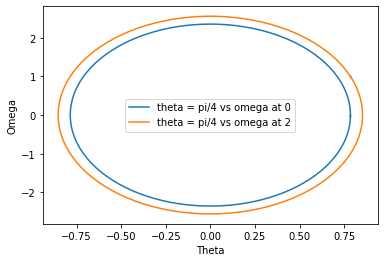

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------
def SHO(theta,omega):
    return np.array([omega, -omega2*theta])
#-------------------------------------------------------------------------------
#Parameters: Function used, initial conditions, dimensionless timespace, and delta tau
def RungeKutta_FourthOrder(F, theta0, omega0, tau, dtau):
    #Solution Space
    theta = []
    omega = []
    #Loop through 4th Order Runge-Kutta method
    for i in range(0,len(tau)):
      theta.append(theta0)
      omega.append(omega0)
      k1 = dtau*F(theta0,omega0)
      k2 = dtau*F(theta0 + 0.5*k1[0], omega0 + 0.5*k1[1])
      k3 = dtau*F(theta0 + 0.5*k2[0], omega0 + 0.5*k2[1])
      k4 = dtau*F(theta0 + k3[0], omega0 + k3[1])
      theta0 = theta0 + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
      omega0 = omega0 + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
    return np.asarray(theta),np.asarray(omega)
#-----------------------------------------------------------------------------
# Omega^2 term in SHO
omega2 = 9
period = 2*np.pi/np.sqrt(omega2)
# Initial Conditions
theta_0 = np.array([np.pi/4, np.pi/2, np.pi])
omega_0 = np.array([0,1,2])
# Time parameters
taufinal = period
dtau = 0.01
tau = np.arange(0,taufinal+dtau,dtau)

### Solve
[theta1,omega1] = RungeKutta_FourthOrder(SHO,theta_0[0],omega_0[0],tau,dtau)
[theta2,omega2] = RungeKutta_FourthOrder(SHO,theta_0[0],omega_0[1],tau,dtau)
#[theta2,omega3] = RungeKutta_FourthOrder(SHO,theta_0,omega_0[2],tau,dtau)
#[theta4,omega4] = RungeKutta_FourthOrder(SHO,theta_0[1],omega_0[0],tau,dtau)
#[theta5,omega5] = RungeKutta_FourthOrder(SHO,theta_0[2],omega_0[0],tau,dtau)

plt.figure(1)
plt.plot(theta1,omega1, label='theta = pi/4 vs omega at 0')
plt.plot(theta2,omega2, label='theta = pi/4 vs omega at 2')
#plt.plot(theta3,omega3, label='theta = pi/4 vs omega at 4')
#plt.plot(theta4,omega4, label='theta = pi/2 vs omega at 0')
#plt.plot(theta5,omega5, label='theta = pi vs omega at 0')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.legend()

**Not sure why, but my other initial conditions on the SHO above aren't working...**

B) Numerically solve the 2-dim ODE for the Van der Pol oscillator (Eq. 2 in chapter 7): generate ONE figure, where you plot trajectories for different initial conditions.

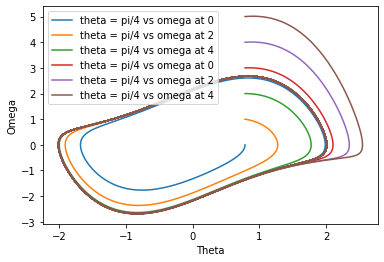

In [ ]:
#-------------------------------------------------------------------------------
# Van Der Pol Equation:
def VanDerPol(theta,omega):
    return np.array([omega, -mu*(np.square(theta) - 1)*omega - theta])
#-------------------------------------------------------------------------------
#Parameters: Function used, initial conditions, dimensionless timespace, and delta tau
def RungeKutta_FourthOrder(F, theta0, omega0, tau, dtau):
    #Solution Space
    theta = []
    omega = []
    #Loop through 4th Order Runge-Kutta method
    for i in range(0,len(tau)):
      theta.append(theta0)
      omega.append(omega0)
      k1 = dtau*F(theta0,omega0)
      k2 = dtau*F(theta0 + 0.5*k1[0], omega0 + 0.5*k1[1])
      k3 = dtau*F(theta0 + 0.5*k2[0], omega0 + 0.5*k2[1])
      k4 = dtau*F(theta0 + k3[0], omega0 + k3[1])
      theta0 = theta0 + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
      omega0 = omega0 + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
    return np.asarray(theta),np.asarray(omega)
#-----------------------------------------------------------------------------
# Mu term in van der pol equation
mu = 1
# Initial Conditions
theta_0 = np.pi/4.
omega_0 = np.array([0, 1, 2, 3, 4, 5, 6])
# Time parameters
taufinal = 40*period
dtau = 0.01
tau = np.arange(0,taufinal+dtau,dtau)

### Solve
[theta1,omega1] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[0],tau,dtau)
[theta2,omega2] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[1],tau,dtau)
[theta3,omega3] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[2],tau,dtau)
[theta4,omega4] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[3],tau,dtau)
[theta5,omega5] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[4],tau,dtau)
[theta6,omega6] = RungeKutta_FourthOrder(VanDerPol,theta_0,omega_0[5],tau,dtau)

plt.figure(1)
plt.plot(theta1,omega1, label='theta = pi/4 vs omega at 0')
plt.plot(theta2,omega2, label='theta = pi/4 vs omega at 2')
plt.plot(theta3,omega3, label='theta = pi/4 vs omega at 4')
plt.plot(theta4,omega4, label='theta = pi/4 vs omega at 0')
plt.plot(theta5,omega5, label='theta = pi/4 vs omega at 2')
plt.plot(theta6,omega6, label='theta = pi/4 vs omega at 4')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.legend()


C) Compare your numerical findings in A) and B) and describe the differences and similarities.

## The biggest similarity is that the Van Der Pol equation eventually shows periodic behavior like the SHO. However, both are still fairly different qualitatively. The Van Der Pol equation has a stable period path but if the initial conditions (initial energy) are such that it does lie on the stable path it will slowly spiral into that path. If initial conditions lie the particle "inside" the path it will spiral outwards eventually reaching the stable path and if the initial conditions are such that the particle lies "outside" the path it will spiral downwards towards the stable path.  